In [3]:
import torch
import numpy as np
import random
from IPython import display
from matplotlib import pyplot as plt
from torch import nn
import torch.utils.data as Data
import torch.optim as optim
from torch.nn import init
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"  #防止jupyter崩溃

In [4]:
#自定义数据---训练集
num_inputs = 500
num_examples = 10000
true_w = torch.ones(500,1)*0.0056
true_b = 0.028
x_features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float)
y_labels = torch.mm(x_features,true_w) + true_b
y_labels += torch.tensor(np.random.normal(0, 0.01, size=y_labels.size()), dtype=torch.float)
#训练集
trainfeatures =x_features[:7000]
trainlabels = y_labels[:7000]
print(trainfeatures.shape)
#测试集
testfeatures =x_features[7000:]
testlabels = y_labels[7000:]
print(testfeatures.shape)

torch.Size([7000, 500])
torch.Size([3000, 500])


In [5]:
#读取数据
batch_size = 50
# 将训练数据的特征和标签组合
dataset = Data.TensorDataset(trainfeatures, trainlabels)
# 把 dataset 放入 DataLoader
train_iter = Data.DataLoader(
    dataset=dataset, # torch TensorDataset format
    batch_size=batch_size, # mini batch size
    shuffle=True, # 是否打乱数据 (训练集一般需要进行打乱)
    num_workers=0, # 多线程来读数据， 注意在Windows下需要设置为0
)
# 将测试数据的特征和标签组合
dataset = Data.TensorDataset(testfeatures, testlabels)
# 把 dataset 放入 DataLoader
test_iter = Data.DataLoader(
    dataset=dataset, # torch TensorDataset format
    batch_size=batch_size, # mini batch size
    shuffle=True, # 是否打乱数据 (训练集一般需要进行打乱)
    num_workers=0, # 多线程来读数据， 注意在Windows下需要设置为0
)

In [6]:
#实现FlattenLayer层
class FlattenLayer(torch.nn.Module):
    def __init__(self):
         super(FlattenLayer, self).__init__()
    def forward(self, x):
        return x.view(x.shape[0],-1)

In [7]:
#模型定义和参数初始化
num_hiddens,num_outputs = 256,1
net = nn.Sequential(
        FlattenLayer(),
        nn.Linear(num_inputs,num_hiddens),
        nn.ReLU(),
        nn.Linear(num_hiddens,num_outputs)
        )

for params in net.parameters():
    init.normal_(params,mean=0,std=0.01)

In [8]:
lr = 0.01
#损失函数和优化器
loss = torch.nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(),lr)

In [9]:
#定义模型训练函数
def train(net,train_iter,test_iter,loss,num_epochs,batch_size,params=None,lr=None,optimizer=None):
    train_ls = []
    test_ls = []
    for epoch in range(num_epochs): # 训练模型一共需要num_epochs个迭代周期
        train_l_sum, train_acc_num,n = 0.0,0.0,0
        # 在每一个迭代周期中，会使用训练数据集中所有样本一次
        for X, y in train_iter: # x和y分别是小批量样本的特征和标签
            y_hat = net(X)
            l = loss(y_hat, y.view(-1,1)) # l是有关小批量X和y的损失
            #梯度清零
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()
            l.backward() # 小批量的损失对模型参数求梯度
            if optimizer is None:
                SGD(params,lr)
            else:
                optimizer.step()
        train_labels = trainlabels.view(-1,1)
        test_labels = testlabels.view(-1,1)
        train_ls.append(loss(net(trainfeatures),train_labels).item())
        test_ls.append(loss(net(testfeatures),test_labels).item())
        print('epoch %d,train_loss %.6f,test_loss %f'%(epoch+1, train_ls[epoch],test_ls[epoch]))
    return train_ls,test_ls

In [10]:
#训练次数和学习率
num_epochs = 200
train_loss,test_loss = train(net,train_iter,test_iter,loss,num_epochs,batch_size,net.parameters,lr,optimizer)

epoch 1,train_loss 0.014403,test_loss 0.015476
epoch 2,train_loss 0.013396,test_loss 0.014535
epoch 3,train_loss 0.012381,test_loss 0.013608
epoch 4,train_loss 0.011315,test_loss 0.012592
epoch 5,train_loss 0.010163,test_loss 0.011503
epoch 6,train_loss 0.008939,test_loss 0.010316
epoch 7,train_loss 0.007682,test_loss 0.009081
epoch 8,train_loss 0.006454,test_loss 0.007828
epoch 9,train_loss 0.005318,test_loss 0.006656
epoch 10,train_loss 0.004325,test_loss 0.005629
epoch 11,train_loss 0.003503,test_loss 0.004725
epoch 12,train_loss 0.002845,test_loss 0.003954
epoch 13,train_loss 0.002342,test_loss 0.003360
epoch 14,train_loss 0.001962,test_loss 0.002884
epoch 15,train_loss 0.001679,test_loss 0.002517
epoch 16,train_loss 0.001465,test_loss 0.002243
epoch 17,train_loss 0.001304,test_loss 0.002018
epoch 18,train_loss 0.001180,test_loss 0.001852
epoch 19,train_loss 0.001083,test_loss 0.001719
epoch 20,train_loss 0.001006,test_loss 0.001615
epoch 21,train_loss 0.000945,test_loss 0.001537
e

epoch 171,train_loss 0.000082,test_loss 0.000849
epoch 172,train_loss 0.000081,test_loss 0.000848
epoch 173,train_loss 0.000080,test_loss 0.000847
epoch 174,train_loss 0.000079,test_loss 0.000848
epoch 175,train_loss 0.000078,test_loss 0.000847
epoch 176,train_loss 0.000077,test_loss 0.000847
epoch 177,train_loss 0.000077,test_loss 0.000847
epoch 178,train_loss 0.000076,test_loss 0.000846
epoch 179,train_loss 0.000075,test_loss 0.000844
epoch 180,train_loss 0.000074,test_loss 0.000845
epoch 181,train_loss 0.000073,test_loss 0.000845
epoch 182,train_loss 0.000073,test_loss 0.000845
epoch 183,train_loss 0.000072,test_loss 0.000845
epoch 184,train_loss 0.000071,test_loss 0.000843
epoch 185,train_loss 0.000070,test_loss 0.000843
epoch 186,train_loss 0.000070,test_loss 0.000843
epoch 187,train_loss 0.000069,test_loss 0.000842
epoch 188,train_loss 0.000068,test_loss 0.000843
epoch 189,train_loss 0.000067,test_loss 0.000842
epoch 190,train_loss 0.000067,test_loss 0.000842
epoch 191,train_loss

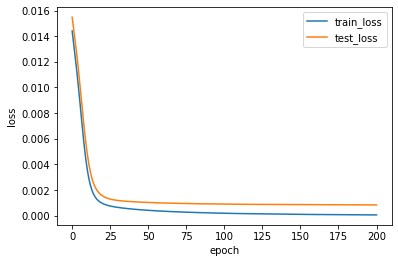

In [11]:
x = np.linspace(0,len(train_loss),len(train_loss))
plt.plot(x,train_loss,label="train_loss",linewidth=1.5)
plt.plot(x,test_loss,label="test_loss",linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()